# CSCE 421 :: Machine Learning :: Texas A&M University :: Fall 2021

# Homework 2 (HW-2)
**Name: Nicholas Soliman**  
**UIN:326009195**  

## Problem 1: Linear regression implementation

#### (1) Download and read the data.

In [1819]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

#### (2) Print the data. 

In [1820]:
print(train_data.head())
print(test_data.head())

      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984
    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864


#### (3) Prepare your input data and label. 

In [1821]:
# train_data.apply (pd.to_numeric, errors='coerce')
train_data.dropna(inplace=True)
print("Dropped Nan Samples...")
label = train_data.shape
print("Label: ", label)

Dropped Nan Samples...
Label:  (699, 2)


#### (4) Implement LinearRegression class

In [1822]:
# Linear regression class
class LinearRegression:   
    def __init__(self, learning_rate=0.00001, iterations=30, precision = 0.000001):        
        self.learning_rate = learning_rate   
        self.iterations = iterations
        self.precision = precision
          
    # Function for model training         
    def fit(self):
          
        # weight initialization         
        self.sample_weight = 0.8

        # data
        self.X = train_data
        self.y = test_data

        previous_step_size = 1
        iters = 0
        cur_x = 5
        # gradient descent learning                  
        while previous_step_size > self.precision and iters < self.iterations:
            prev_x = cur_x
            cur_x = cur_x - self.learning_rate * prev_x
            previous_step_size = abs(cur_x - prev_x)
            iters = iters+1
            print("Iteration",iters,"\nX value is",cur_x-(1/iters))
      
    # Helper function to update weights in gradient descent      
    # def update_weights(self):                
        
    #     # calculate gradients 
          
    #     # update weights
          
      
    # # Hypothetical function  h( x )       
    def predict(self): 
        return self.X

#### (5) Build your model and train with training set

In [1823]:
model = LinearRegression()
model.fit()

Iteration 1 
X value is 3.99995
Iteration 2 
X value is 4.4999000005
Iteration 3 
X value is 4.666516668166662
Iteration 4 
X value is 4.74980000299998
Iteration 5 
X value is 4.79975000499995
Iteration 6 
X value is 4.833033340833233
Iteration 7 
X value is 4.856792867642682
Iteration 8 
X value is 4.87460001399972
Iteration 9 
X value is 4.888438906888469
Iteration 10 
X value is 4.8995000224994
Iteration 11 
X value is 4.908540936590084
Iteration 12 
X value is 4.916066699665567
Iteration 13 
X value is 4.922426962075494
Iteration 14 
X value is 4.927871474069609
Iteration 15 
X value is 4.932583385831059
Iteration 16 
X value is 4.9367000599972
Iteration 17 
X value is 4.940326538584836
Iteration 18 
X value is 4.943544520940366
Iteration 19 
X value is 4.946418506547788
Iteration 20 
X value is 4.949000094994301
Iteration 21 
X value is 4.951331057374303
Iteration 22 
X value is 4.953445570037755
Iteration 23 
X value is 4.955371865621581
Iteration 24 
X value is 4.957133471323215

#### (6) Make predictions with test set

In [1824]:
linear_pred = model.predict()
print(linear_pred)

        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[699 rows x 2 columns]


#### (7) Calculate and print the mean square error of your prediction.

In [1825]:
MSE = np.square(np.subtract(train_data,linear_pred)).mean()
print("Mean Square Error: ", MSE)

Mean Square Error:  x    0.0
y    0.0
dtype: float64


#### (8) Plot your prediction and labels.

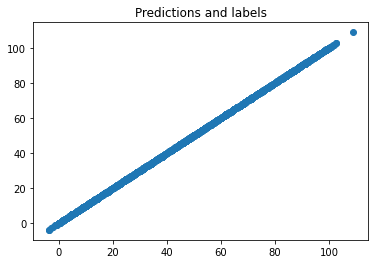

In [1826]:
# Plot your prediction and labels
import matplotlib.pyplot as plt
plt.scatter(linear_pred, train_data)
plt.title("Predictions and labels")
plt.show()

## Problem 2: Preprocessing the Data.

#### (1) Download and read the data.

In [1827]:
# Load data using pandas
import pandas as pd

hitters_data = pd.read_csv("Hitters.csv")

#### (2) Print the data. 

In [1828]:
print(hitters_data.head())

              Player  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
0     -Andy Allanson    293    66      1    30   29     14      1     293   
1        -Alan Ashby    315    81      7    24   38     39     14    3449   
2       -Alvin Davis    479   130     18    66   72     76      3    1624   
3      -Andre Dawson    496   141     20    65   78     37     11    5628   
4  -Andres Galarraga    321    87     10    39   42     30      2     396   

   CHits  ...  CRuns  CRBI  CWalks  League Division PutOuts  Assists  Errors  \
0     66  ...     30    29      14       A        E     446       33      20   
1    835  ...    321   414     375       N        W     632       43      10   
2    457  ...    224   266     263       A        W     880       82      14   
3   1575  ...    828   838     354       N        E     200       11       3   
4    101  ...     48    46      33       N        E     805       40       4   

   Salary  NewLeague  
0     NaN          A  
1   475.0 

#### (3) Print the shape of the data.

In [1829]:
print("Shape: ", hitters_data.shape)

Shape:  (322, 21)


#### (4) Does the data have any missing values?  How many are missing?

In [1830]:
# Missing value check
missing_values = hitters_data.isnull().sum()
print(missing_values)

Player        0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64


#### (5) Drop all  the rows  with any missing data.

In [1831]:
hitters_data.dropna(inplace=True)
missing_values = hitters_data.isnull().sum()
print(missing_values)

Player       0
AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64


#### (6) Extract the features and the label from the data.

In [1832]:
X = hitters_data[["HmRun", "Years", "NewLeague"]]
label = len(hitters_data)
print("Label: ", label)
print(X)

Label:  263
     HmRun  Years NewLeague
1        7     14         N
2       18      3         A
3       20     11         N
4       10      2         N
5        4     11         A
..     ...    ...       ...
317      7      5         N
318      5     12         A
319      3      6         A
320      9      8         A
321      9     11         A

[263 rows x 3 columns]


#### (7) Data preprocessing. 

In [1833]:
categorical=X.select_dtypes(exclude=['float64','int64'])
cat_dummy = pd.get_dummies(categorical)
categorical = pd.concat([X, cat_dummy], axis=1)
categorical.pop("NewLeague")
categorical.pop("NewLeague_A")
print(X)


     HmRun  Years NewLeague
1        7     14         N
2       18      3         A
3       20     11         N
4       10      2         N
5        4     11         A
..     ...    ...       ...
317      7      5         N
318      5     12         A
319      3      6         A
320      9      8         A
321      9     11         A

[263 rows x 3 columns]


#### (8) Transform the output into numerical format.  

In [1834]:
categorical.replace('A', 0)
categorical.replace('N', 1)
print(categorical)

     HmRun  Years  NewLeague_N
1        7     14            1
2       18      3            0
3       20     11            1
4       10      2            1
5        4     11            0
..     ...    ...          ...
317      7      5            1
318      5     12            0
319      3      6            0
320      9      8            0
321      9     11            0

[263 rows x 3 columns]


## Problem 3: Models for Hitters

#### (1) Prediction

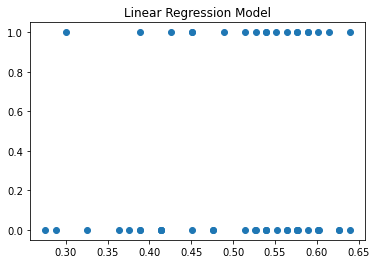

Logistic Regression:
              precision    recall  f1-score   support

           0       0.61      0.50      0.55       141
           1       0.52      0.64      0.58       122

    accuracy                           0.56       263
   macro avg       0.57      0.57      0.56       263
weighted avg       0.57      0.56      0.56       263



In [1835]:
# Split dataset to training set and test set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = categorical[["HmRun", "Years"]]
y = categorical["NewLeague_N"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
linear_model = LinearRegression().fit(X_train, y_train)
lin_predictions = linear_model.predict(X_test)
plt.scatter(lin_predictions, y_test)
plt.title("Linear Regression Model")
plt.show()
#-------------------------------------------
logistic_model = LogisticRegression().fit(X_train,y_train)
p_pred = logistic_model.predict_proba(X_test)[::,1]
y_pred = logistic_model.predict(X)
score_ = logistic_model.score(X, y)
conf_m = confusion_matrix(y, y_pred)
info = classification_report(y, y_pred)
print('Logistic Regression:', info, sep='\n')

#####  (2) (a) Please provide the coefficients for each feature for both models. Are they the same? Are they different? Why?

In [1836]:
print("Linear Model Coefficients: ", linear_model.coef_)
print("Logistic Model Coefficients: ", logistic_model.coef_)

Linear Model Coefficients:  [-1.25299842e-02  6.18965884e-05]
Logistic Model Coefficients:  [[-0.05283313  0.00090749]]


##### (2) (b) Please plot the ROC curve for both models. What are the area under the curve measurements?

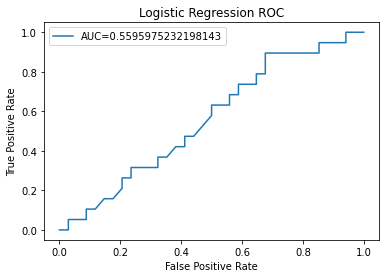

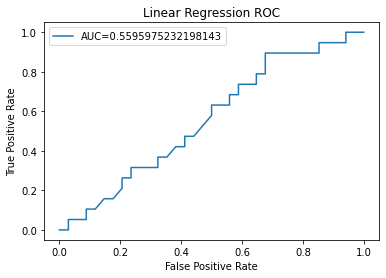

In [1837]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test,  p_pred)
auc = metrics.roc_auc_score(y_test, p_pred)

plt.plot(fpr,tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc=2)
plt.show()
#-------------------------------------
fpr2, tpr2, _ = metrics.roc_curve(y_test,  lin_predictions)
auc = metrics.roc_auc_score(y_test, lin_predictions)

plt.plot(fpr2,tpr2, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Linear Regression ROC')
plt.legend(loc=2)
plt.show()

##### (2) (c) What is the optimal decision threshold to maximize the f1 score?

In [1838]:
from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax

fpr, tpr, thresholds = roc_curve(y_test, p_pred)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Optimal Decision Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Optimal Decision Threshold=0.527821, G-Mean=0.562


#### (3) Five-fold Cross-validation: Repeat (1) using a stratified, five-fold cross-validation.

Auroc values after each fold:
1 : 0.11542857142857141
2 : 0.22014285714285714
3 : 0.3378152709359606
4 : 0.45448193760262723
5 : 0.5687676518883416
Final Auroc value:  0.5687676518883416


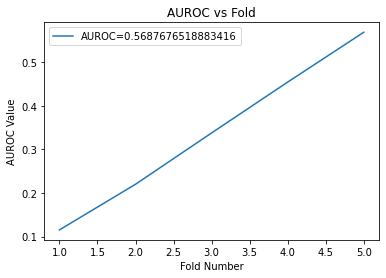

In [1839]:
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

max_iter = 1e8

auc_value = 0
auc_array = []
fold_count = 0
fold_array = [1,2,3,4,5]

print("Auroc values after each fold:")
skf=StratifiedKFold(n_splits=5, shuffle=True)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()

    log_regressor   = LogisticRegression(penalty='l2', max_iter = max_iter)
    log_regressor.fit(X_train, y_train)
    log_pred   =   log_regressor.predict(X_test)
    
    auc_value   += roc_auc_score(y_test, log_pred)/num_of_folds
    fold_count += 1
    auc_array.append(auc_value)
    print(fold_count,":", auc_value)

print ("Final Auroc value: ", auc_value)
plt.plot(fold_array, auc_array, label="AUROC="+str(auc_value))
plt.ylabel('AUROC Value')
plt.xlabel('Fold Number')
plt.title('AUROC vs Fold')
plt.legend(loc=2)
plt.show()

##### (3) (a) Do the features change in each fold?

In [1840]:
for i in range(len(auc_array)-1):
    print("Difference between fold", i+1, "and fold", i+2, "is: ", auc_array[i+1]-auc_array[i])
print("The amount they change by is relatively consistent but there is a general trend of them increasing")

Difference between fold 1 and fold 2 is:  0.10471428571428573
Difference between fold 2 and fold 3 is:  0.11767241379310345
Difference between fold 3 and fold 4 is:  0.11666666666666664
Difference between fold 4 and fold 5 is:  0.11428571428571432


##### (3) (b) Please provide a mean and 95% confidence interval for the AUROCs for each model.

##### (3) (c) Please provide a mean and 95% confidence interval for the f1 score for each model.